# Project - Olympic Sports Analysis [Data Pre-processing]
- Data Cleaning and Manipulation
- Data Grouping and Aggregation
- Data Reshaping and Pivoting
- Data Merging, Joining and Concatenation

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [31]:
countries = pd.read_csv('Data/dictionary.csv')
summer = pd.read_csv('Data/summer.csv')
winter = pd.read_csv('Data/winter.csv')

### Inspecting Data

In [32]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [33]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [34]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [35]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [36]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [37]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


- Change the datatype of Year (int => datetime)
- fill the NA values in countries['population','GDP Per capita]
- Rename column GDP per Capita (GDP_Per_Capita)
- Standardize Athlete column
- Make the 'Gender' Column as Categorical type

## Proposed Questions

- **Analyzing all Summer editions data**
    - Find the **highest** male/female **athletes** of all time in the Summer edition
    - Find the **highest athletes** regarding each **medal type** in the Summer edition
- **Which are the most successful countries in both all Summer and Winter editions?**
    - What are the **Top 10** counties by **total medals** ?
    - **Split** the total medal of Top 10 Countries into **Summer/Winter**. Are there typical Summer/Winter Games Countries?
    - **Split** the total medals of Top 10 Countries into **Gold, Silver, Bronze**

### Q. Find the highest male/female athletes of all time in the Summer edition

In [38]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [39]:
summer['Athlete'].str.split(', ').str[::-1]

0                    [Alfred, HAJOS]
1                 [Otto, HERSCHMANN]
2                [Dimitrios, DRIVAS]
3               [Ioannis, MALOKINIS]
4               [Spiridon, CHASAPIS]
                    ...             
31160           [Damian, JANIKOWSKI]
31161    [Ghasem Gholamreza, REZAEI]
31162               [Rustam, TOTROV]
31163            [Artur, ALEKSANYAN]
31164               [Jimmy, LIDBERG]
Name: Athlete, Length: 31165, dtype: object

In [40]:
summer['Athlete']  = summer['Athlete'].str.split(', ').str[::-1].str.join(' ')

In [41]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze


In [42]:
countries

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [43]:
summer_df = summer.merge(countries, how = 'left', left_on = 'Country', right_on = 'Code')
summer_df

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze,Poland,POL,37999494.0,12554.547554
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold,Iran,IRI,79109272.0,NaN
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver,Russia,RUS,144096812.0,9092.580536
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze,Armenia,ARM,3017712.0,3489.127690


In [44]:
summer_df.drop(columns=['Population','GDP per Capita','Code'], inplace=True)

In [45]:
summer_df.rename(columns={'Country_x': 'Code', 'Country_y': 'Country'}, inplace=True)

summer_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze,Poland
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold,Iran
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver,Russia
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze,Armenia


In [46]:
summer_df[summer_df['Gender'] == 'Men']['Athlete'].value_counts()[:10]

Athlete
Michael PHELPS         22
Nikolay ANDRIANOV      15
Boris SHAKHLIN         13
Takashi ONO            13
Edoardo MANGIAROTTI    13
Sawao KATO             12
Paavo NURMI            12
Alexei NEMOV           12
Mark SPITZ             11
Ryan LOCHTE            11
Name: count, dtype: int64

In [47]:
summer_df[summer_df['Gender'] == 'Men']['Athlete'].value_counts()[:10].index

Index(['Michael PHELPS', 'Nikolay ANDRIANOV', 'Boris SHAKHLIN', 'Takashi ONO',
       'Edoardo MANGIAROTTI', 'Sawao KATO', 'Paavo NURMI', 'Alexei NEMOV',
       'Mark SPITZ', 'Ryan LOCHTE'],
      dtype='object', name='Athlete')

In [48]:
summer_df[summer_df['Gender'] == 'Men']['Athlete'].value_counts()[:10].values

array([22, 15, 13, 13, 13, 12, 12, 12, 11, 11], dtype=int64)

In [49]:
summer_df[summer_df['Gender'] == 'Women']['Athlete'].value_counts()[:10]

Athlete
Larisa LATYNINA          18
Birgit FISCHER           12
Dara TORRES              12
Jenny THOMPSON           12
Natalie COUGHLIN         12
Vera CASLAVSKA           11
Franziska VAN ALMSICK    10
Polina ASTAKHOVA         10
Agnes KELETI             10
Lyudmila TURISCHEVA       9
Name: count, dtype: int64

### Q. Find the highest athletes regarding each medal type in the Summer edition

In [50]:
summer_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze,Poland
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold,Iran
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver,Russia
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze,Armenia


In [51]:
top_medals = summer_df.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values('Sport', ascending=False)
top_medals

,Athlete,Medal,Sport
17347,Michael PHELPS,Gold,18
16587,Mark SPITZ,Gold,9
19234,Paavo NURMI,Gold,9
3521,Carl LEWIS,Gold,9
14741,Larisa LATYNINA,Gold,9
...,...,...,...
9527,Harald HEINKE,Bronze,1
9526,Harald HEIN,Silver,1
9525,Harald HEIN,Gold,1
9523,Harald HALVORSEN,Silver,1


In [52]:
top_medals.rename(columns={'Sport': 'Count_of_Medals'}, inplace=True)
top_medals

,Athlete,Medal,Count_of_Medals
17347,Michael PHELPS,Gold,18
16587,Mark SPITZ,Gold,9
19234,Paavo NURMI,Gold,9
3521,Carl LEWIS,Gold,9
14741,Larisa LATYNINA,Gold,9
...,...,...,...
9527,Harald HEINKE,Bronze,1
9526,Harald HEIN,Silver,1
9525,Harald HEIN,Gold,1
9523,Harald HALVORSEN,Silver,1


In [53]:
top_medals.drop_duplicates(subset=['Count_of_Medals'], keep='first')

,Athlete,Medal,Count_of_Medals
17347,Michael PHELPS,Gold,18
16587,Mark SPITZ,Gold,9
20450,Ray EWRY,Gold,8
3121,Boris SHAKHLIN,Gold,7
7647,Franziska VAN ALMSICK,Bronze,6
18523,Nikolay ANDRIANOV,Silver,5
22667,Stanislav POZDNYAKOV,Gold,4
20278,Raimondo D'INZEO,Bronze,3
18571,Nina BOCHAROVA,Gold,2
17674,Milorad STANULOV,Bronze,1


Data Merging

In [54]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver


In [55]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [56]:
pd.concat([summer, winter], keys=['Summer', 'Winter'], names=['Edition'])

Year    City     Sport Discipline             Athlete Country  \
Edition                                                                       
Summer  0     1896  Athens  Aquatics   Swimming        Alfred HAJOS     HUN   
        1     1896  Athens  Aquatics   Swimming     Otto HERSCHMANN     AUT   
        2     1896  Athens  Aquatics   Swimming    Dimitrios DRIVAS     GRE   
        3     1896  Athens  Aquatics   Swimming   Ioannis MALOKINIS     GRE   
        4     1896  Athens  Aquatics   Swimming   Spiridon CHASAPIS     GRE   
...            ...     ...       ...        ...                 ...     ...   
Winter  5765  2014   Sochi    Skiing  Snowboard        JONES, Jenny     GBR   
        5766  2014   Sochi    Skiing  Snowboard     ANDERSON, Jamie     USA   
        5767  2014   Sochi    Skiing  Snowboard  MALTAIS, Dominique     CAN   
        5768  2014   Sochi    Skiing  Snowboard        SAMKOVA, Eva     CZE   
        5769  2014   Sochi    Skiing  Snowboard    TRESPEUCH, Chloe     FRA   

             Gender                       Event   Medal  
Edition                                                  
Summer  0       Men              100M Freestyle    Gold  
        1       Men              100M Freestyle  Silver  
        2       Men  100M Freestyle For Sailors  Bronze  
        3       Men  100M Freestyle For Sailors    Gold  
        4       Men  100M Freestyle For Sailors  Silver  
...             ...                         ...     ...  
Winter  5765  Women                  Slopestyle  Bronze  
        5766  Women                  Slopestyle    Gold  
        5767  Women             Snowboard Cross  Silver  
        5768  Women             Snowboard Cross    Gold  
        5769  Women             Snowboard Cross  Bronze  

[36935 rows x 9 columns]

In [57]:
olympics = pd.concat([summer, winter], keys=['Summer', 'Winter'], names=['Edition']).reset_index().drop(columns=['level_1'])
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [58]:
olympics_df = olympics.merge(countries.iloc[:, :2], how='left', left_on='Country', right_on='Code').drop(columns=['Code']).reset_index().rename(columns={'Country_x': 'Code','Country_y': 'Country'}).drop(columns=['index'])

olympics_df

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


Data Cleaning

In [59]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [60]:
olympics_df[olympics_df['Country'].isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,Edwin FLACK,ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,George Stuart ROBERTSON,ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,John BOLAND,ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,Friedrich TRAUN,ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,Dionysios KASDAGLIS,ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [61]:
olympics_df[olympics_df['Country'].isnull()]['Code'].value_counts()

Code
URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: count, dtype: int64

In [62]:
old_codes = olympics_df[olympics_df['Country'].isnull()]['Code'].value_counts().index
old_codes

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object', name='Code')

In [63]:
mapper = pd.Series(index= old_codes,
                   data = ["Soviet Union",'East Germany','Romania','West Germany','Czechoslovakia','Yugoslavia','Unified Team','United Team of Germany','Mixed team','Serbia','Australasia','Russian Empire','Montenegro','Trinidad and Tobago','Bohemia','British West Indies','Singapore','Independent Olympic Participants'],
                   name = 'Country')
mapper

Code
URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA              United Team of Germany
ZZX                          Mixed team
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI                 British West Indies
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [64]:
missing_indices = olympics_df[olympics_df['Country'].isnull()].index
missing_indices

Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,   260,
       ...
       33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979, 33980],
      dtype='int64', length=6367)

In [65]:
olympics_df.loc[missing_indices,'Code'].map(mapper)

132          Mixed team
133          Mixed team
134          Mixed team
135          Mixed team
136          Mixed team
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [66]:
olympics_df['Country'].fillna(olympics_df.loc[missing_indices,'Code'].map(mapper), inplace=True)

In [67]:
olympics_df[olympics_df['Country'].isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,Besik KUDUKHOV,NaN,Men,Wf 60 KG,Silver,NaN


In [68]:
olympics_df.dropna(subset=['Code'], inplace=True)

In [69]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [70]:
olympics_df.reset_index(inplace=True, drop=True)
olympics_df

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


### Q. What are the Top 10 counties by total medals ?

In [71]:
olympics_df['Country'].value_counts().nlargest(10)

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: count, dtype: int64

<Axes: xlabel='Countries', ylabel='total Medals'>

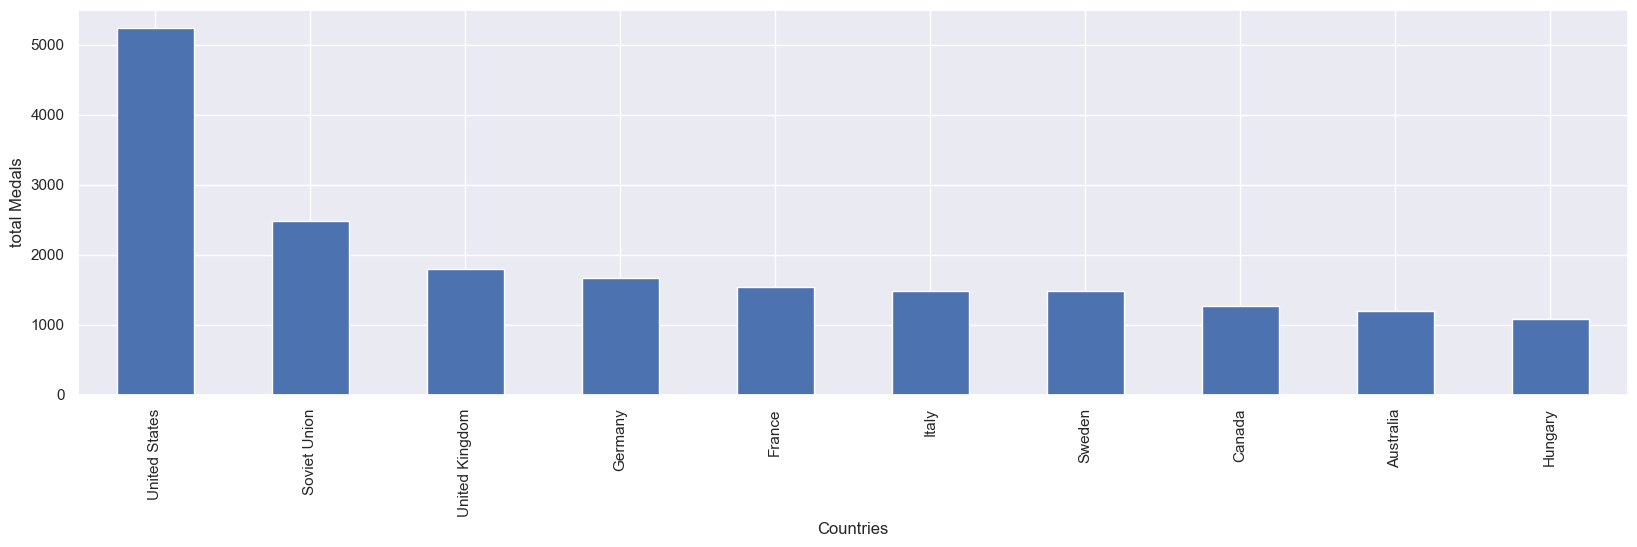

In [72]:
olympics_df['Country'].value_counts().nlargest(10).plot(kind='bar', figsize=(20,5), ylabel='total Medals', xlabel='Countries')

##### Split the total medal of Top 10 Countries into Summer/Winter. Are there typical Summer/Winter Games Countries?

In [73]:
top_10 = olympics_df['Country'].value_counts().nlargest(10)
top_10

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: count, dtype: int64

In [74]:
olympics_10 = olympics_df[olympics_df['Country'].isin(top_10.index)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,Francis LANE,USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,Alajos SZOKOLYI,HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,Thomas BURKE,USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


In [75]:
olympics_10.groupby(['Edition','Country'])['Medal'].count()

Edition  Country       
Summer   Australia         1189
         Canada             649
         France            1396
         Germany           1305
         Hungary           1079
         Italy             1296
         Soviet Union      2049
         Sweden            1044
         United Kingdom    1720
         United States     4585
Winter   Australia           15
         Canada             625
         France             152
         Germany            360
         Hungary             12
         Italy              192
         Soviet Union       440
         Sweden             433
         United Kingdom      79
         United States      653
Name: Medal, dtype: int64

<Axes: xlabel='Country', ylabel='count'>

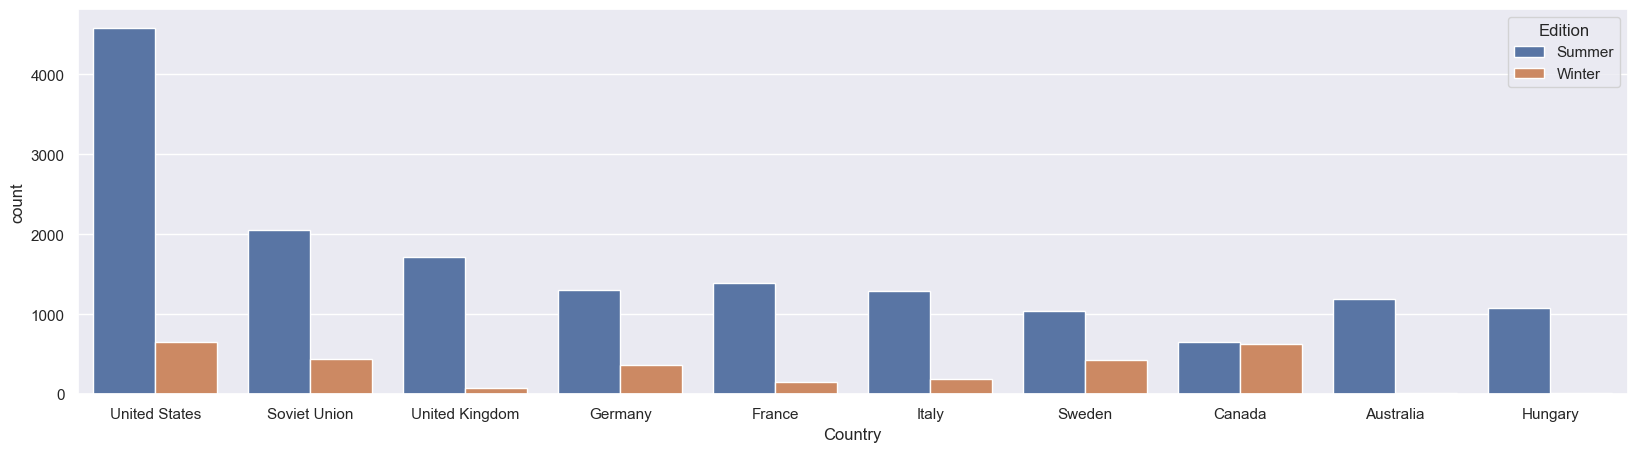

In [76]:
plt.figure(figsize=(20,5))
sns.countplot(data=olympics_10, x='Country', hue='Edition', order=top_10.index)

##### Split the total medals of Top 10 Countries into Gold, Silver, Bronze

In [77]:
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,Francis LANE,USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,Alajos SZOKOLYI,HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,Thomas BURKE,USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


In [80]:
olympics_10['Medal'] = olympics['Medal'].astype('category')

C:\Users\Amr Ahmed\AppData\Local\Temp\ipykernel_16752\375867042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olympics_10['Medal'] = olympics['Medal'].astype('category')


In [84]:
olympics_10['Medal'].value_counts()

Medal
Gold      7226
Silver    6075
Bronze    5972
Name: count, dtype: int64

<Axes: xlabel='Country', ylabel='count'>

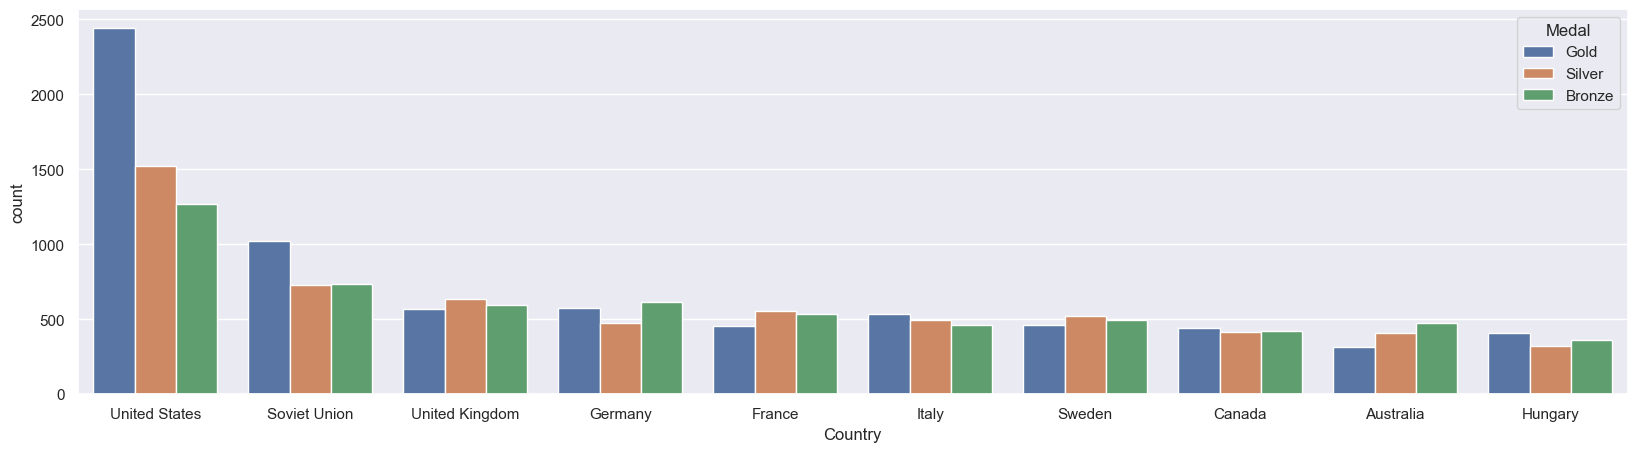

In [85]:
plt.figure(figsize=(20,5))
sns.countplot(data=olympics_10, x='Country', hue='Medal', order=top_10.index, hue_order=['Gold','Silver','Bronze'])